# Machine Learning Project on Flower Recognition with Python

First, let’s import the necessary Python libraries.
Dataset can be downloaded from here: https://www.kaggle.com/alxmamaev/flowers-recognition/download

In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = 'flowers'

Next step is to read each image in the data and create a label for each with the name of the folder

In [8]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

from zipfile import ZipFile
file_name = '/flowers_zip.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Done


Let’s convert the data into numerical values

In [9]:
data_arr = np.array(data)
label_arr = np.array(label)

Let’s use the Label encoder and normalize the data:

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

Split the dataset into 80% training and 20% test sets:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Let’s build a neural network (CNN) model for the task of Flower Recognition:

In [12]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

Before compiling the model we need to create more training images to prevent overfitting:

In [13]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

Let’s compile the neural network model:

In [14]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/64
108/108 [==============================] - 30s 159ms/step - loss: 1.5035 - accuracy: 0.3186 - val_loss: 1.3381 - val_accuracy: 0.4178
Epoch 2/64
108/108 [==============================] - 16s 144ms/step - loss: 1.3681 - accuracy: 0.4023 - val_loss: 1.1555 - val_accuracy: 0.4896
Epoch 3/64
108/108 [==============================] - 15s 137ms/step - loss: 1.2605 - accuracy: 0.4535 - val_loss: 1.1394 - val_accuracy: 0.5370
Epoch 4/64
108/108 [==============================] - 15s 138ms/step - loss: 1.2422 - accuracy: 0.4868 - val_loss: 1.0975 - val_accuracy: 0.5660
Epoch 5/64
108/108 [==============================] - 15s 137ms/step - loss: 1.1927 - accuracy: 0.5169 - val_loss: 1.0166 - val_accuracy: 0.6134
Epoch 6/64
108/108 [==============================] - 15s 138ms/step - loss: 1.1438 - accuracy: 0.5433 - val_loss: 1.0066 - val_accuracy: 0.6134
Epoch 7/64
108/108 [==============================] - 16s 144ms/step - loss: 1.0931 - accuracy: 0.5754 - val_loss: 0.9546 - val_ac

Let’s let the model if it recognize flowers properly:

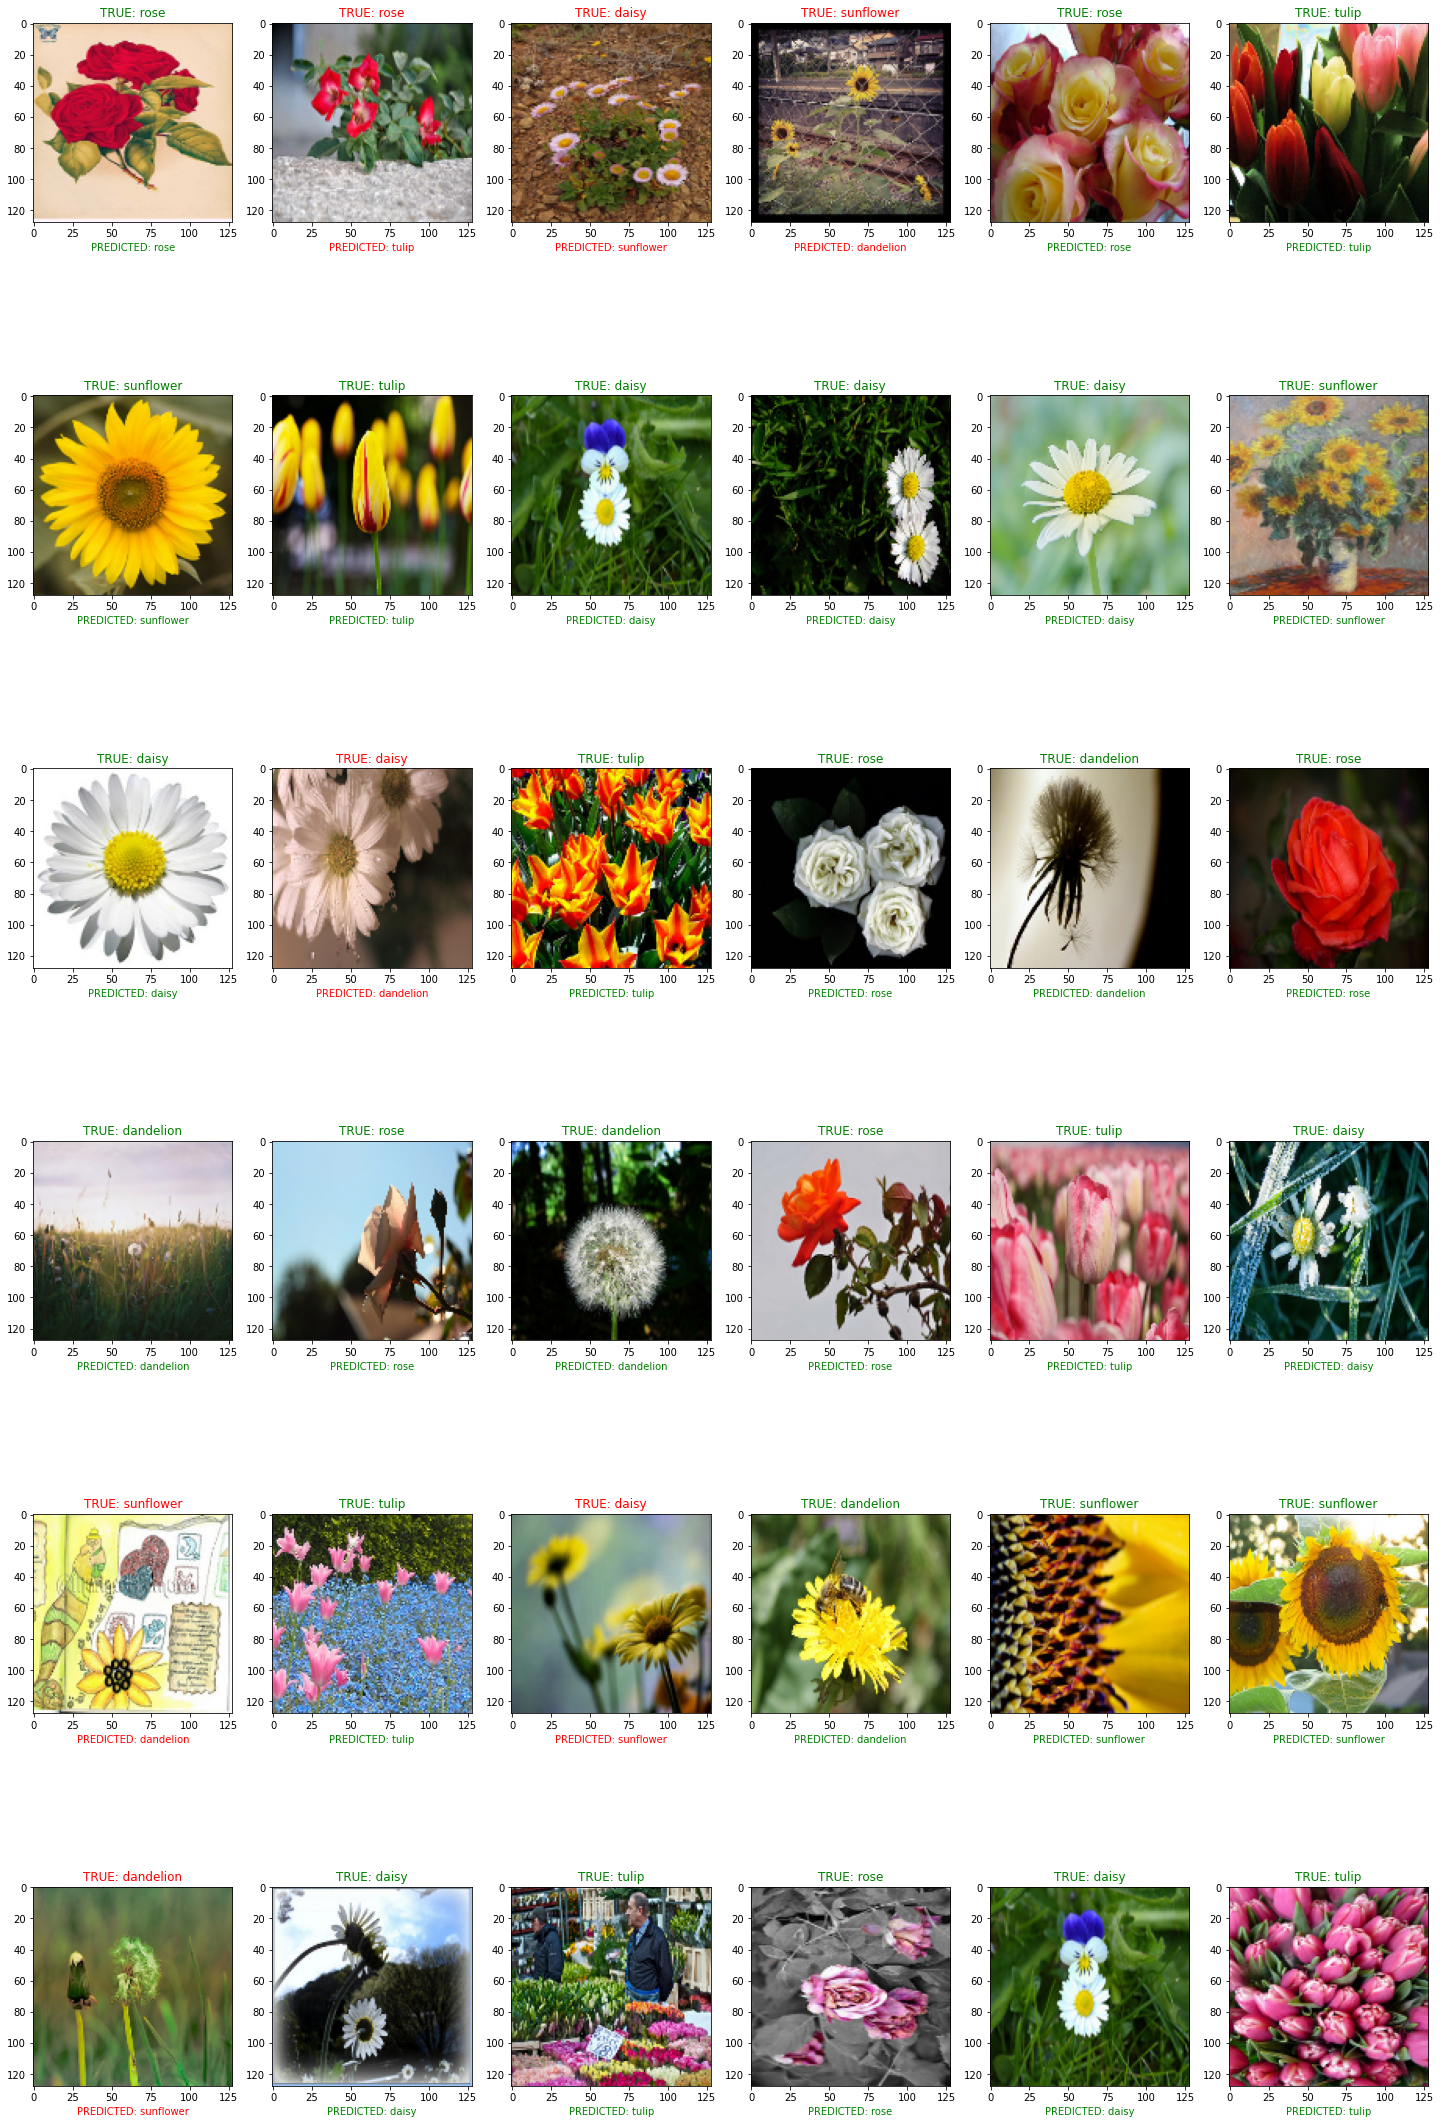

In [16]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

Save the model:

In [18]:
import os
#model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
#model.save(f"../models/{model_version}")
model.save("flowers.h5")